# Lab #1: Introduction to Scikit-learn and Data Preprocessing

**AI in Cybersecurity - Class 03**  
**Instructor: Steve Smith**

---

## Learning Objectives

By the end of this lab, you will be able to:
- ✅ Understand the basic scikit-learn workflow (training, evaluation, prediction)
- ✅ Learn common data preprocessing techniques (handling missing values, encoding, scaling)
- ✅ Apply these techniques to a simple classification problem using the Iris dataset
- ✅ Use LLMs to assist with your machine learning workflow

---

## The Scikit-learn Workflow

**Data Representation**: Data is typically represented in scikit-learn as NumPy arrays or Pandas DataFrames
- **Rows** = samples
- **Columns** = features

**Key Steps**:
1. **Data Loading**: `pd.read_csv()` or from scikit-learn's datasets
2. **Preprocessing**: Cleaning and transforming the data
3. **Model Selection**: Choosing an appropriate algorithm (e.g., Logistic Regression, Decision Tree)
4. **Training**: Fitting the model to the training data using `model.fit(X_train, y_train)`
5. **Prediction**: Making predictions on new data using `model.predict(X_test)`
6. **Evaluation**: Assessing the model's performance `accuracy_score(y_test, y_pred)`

---

## Exercise 1: Loading and Inspecting the Iris Dataset

**What this exercise accomplishes:**
- Introduces you to loading datasets from scikit-learn
- Shows how to inspect dataset structure, features, and target variables
- Demonstrates basic data exploration techniques
- Converts sklearn dataset format to pandas DataFrame for easier manipulation

**Key Concepts:**
- The Iris dataset contains 150 samples of iris flowers
- 4 features: sepal length, sepal width, petal length, petal width (all in cm)
- 3 target classes: setosa (0), versicolor (1), virginica (2)
- This is a classic dataset for learning classification

**Skills you'll learn:**
- Using `load_iris()` from sklearn.datasets
- Exploring dataset attributes (.data, .target, .feature_names, .target_names)
- Creating pandas DataFrames from numpy arrays
- Basic data inspection methods (.info(), .head(), .describe())

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Set random seed for reproducibility
np.random.seed(42)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
# Load the Iris dataset
iris = load_iris()

# Inspect the data structure
print("🌸 IRIS DATASET OVERVIEW")
print("=" * 50)
print(f"📊 Dataset shape: {iris.data.shape}")
print(f"🎯 Target shape: {iris.target.shape}")
print(f"🏷️  Feature names: {iris.feature_names}")
print(f"🌺 Target names: {iris.target_names}")

# Create a pandas DataFrame for easier manipulation
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\n📋 DATASET INFORMATION")
print("=" * 50)
print(df.info())

print("\n🔍 FIRST 5 ROWS")
print("=" * 50)
display(df.head())

print("\n📈 BASIC STATISTICS")
print("=" * 50)
display(df.describe())

print("\n🎯 CLASS DISTRIBUTION")
print("=" * 50)
print(df['species_name'].value_counts())

🌸 IRIS DATASET OVERVIEW
📊 Dataset shape: (150, 4)
🎯 Target shape: (150,)
🏷️  Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
🌺 Target names: ['setosa' 'versicolor' 'virginica']

📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

🔍 FIRST 5 ROWS


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



📈 BASIC STATISTICS


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



🎯 CLASS DISTRIBUTION
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Exercise 2: Handling Missing Values

**What this exercise accomplishes:**
- Teaches you to identify and handle missing data in real datasets
- Demonstrates different strategies for dealing with missing values
- Shows the impact of each strategy on your dataset size and quality
- Introduces scikit-learn's SimpleImputer for systematic missing value treatment

**Key Concepts:**
- **Missing Completely at Random (MCAR)**: Missing values are independent of observed and unobserved data
- **Missing at Random (MAR)**: Missing values depend on observed data but not on unobserved data
- **Missing Not at Random (MNAR)**: Missing values depend on unobserved data

**Skills you'll learn:**
- Detecting missing values with `.isnull().sum()`
- Using `.dropna()` to remove rows with missing data
- Using `SimpleImputer` with different strategies (mean, median, most_frequent)
- Understanding the trade-offs between dropping vs. imputing data

In [4]:
# Check for missing values in the original dataset
print("🔍 MISSING VALUES CHECK - ORIGINAL DATASET")
print("=" * 50)
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Since Iris dataset has no missing values, let's simulate some for learning
print("\n🎭 SIMULATING MISSING DATA FOR DEMONSTRATION")
print("=" * 50)

# Create a copy and introduce missing values
df_with_missing = df.copy()

# Randomly introduce missing values
missing_indices = np.random.choice(df.index, size=15, replace=False)
df_with_missing.loc[missing_indices[:10], 'sepal length (cm)'] = np.nan
df_with_missing.loc[missing_indices[10:], 'petal width (cm)'] = np.nan

print("Missing values after simulation:")
missing_summary = df_with_missing.isnull().sum()
print(missing_summary)
print(f"\nTotal missing values: {missing_summary.sum()}")
print(f"Percentage of data missing: {(missing_summary.sum() / (df_with_missing.shape[0] * df_with_missing.shape[1])) * 100:.2f}%")

🔍 MISSING VALUES CHECK - ORIGINAL DATASET
Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Total missing values: 0

🎭 SIMULATING MISSING DATA FOR DEMONSTRATION
Missing values after simulation:
sepal length (cm)    10
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      5
species               0
species_name          0
dtype: int64

Total missing values: 15
Percentage of data missing: 1.67%


In [5]:
# Strategy 1: Drop rows with missing values
print("📉 STRATEGY 1: DROPPING ROWS WITH MISSING VALUES")
print("=" * 50)

df_dropped = df_with_missing.dropna()
print(f"Original shape: {df_with_missing.shape}")
print(f"Shape after dropping missing rows: {df_dropped.shape}")
print(f"Rows lost: {df_with_missing.shape[0] - df_dropped.shape[0]}")
print(f"Data retention: {(df_dropped.shape[0] / df_with_missing.shape[0]) * 100:.1f}%")

print("\nMissing values after dropping:")
print(df_dropped.isnull().sum())

# Strategy 2: Imputation using SimpleImputer
print("\n🔧 STRATEGY 2: IMPUTATION WITH SIMPLEIMPUTER")
print("=" * 50)

# Impute with mean (for numerical features)
imputer_mean = SimpleImputer(strategy='mean')
df_imputed_mean = df_with_missing.copy()

# Apply imputation to numerical columns only
numerical_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df_imputed_mean[numerical_columns] = imputer_mean.fit_transform(df_imputed_mean[numerical_columns])

print(f"Shape after mean imputation: {df_imputed_mean.shape}")
print("Missing values after mean imputation:")
print(df_imputed_mean.isnull().sum())

print("\n💡 When to use each strategy:")
print("- Mean: Normal distribution, no outliers")
print("- Median: Skewed distribution, presence of outliers")
print("- Most frequent: Categorical data or highly skewed numerical data")

📉 STRATEGY 1: DROPPING ROWS WITH MISSING VALUES
Original shape: (150, 6)
Shape after dropping missing rows: (135, 6)
Rows lost: 15
Data retention: 90.0%

Missing values after dropping:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

🔧 STRATEGY 2: IMPUTATION WITH SIMPLEIMPUTER
Shape after mean imputation: (150, 6)
Missing values after mean imputation:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

💡 When to use each strategy:
- Mean: Normal distribution, no outliers
- Median: Skewed distribution, presence of outliers
- Most frequent: Categorical data or highly skewed numerical data


## Exercise 3: Encoding Categorical Features

**What this exercise accomplishes:**
- Demonstrates why machine learning algorithms need numerical input
- Shows two main approaches to encoding categorical data
- Illustrates the differences between label encoding and one-hot encoding
- Helps you understand when to use each encoding method

**Key Concepts:**
- **Label Encoding**: Converts categories to integers (0, 1, 2, ...)
  - Pros: Compact, works well with tree-based algorithms
  - Cons: Implies ordinal relationship that may not exist
- **One-Hot Encoding**: Creates binary columns for each category
  - Pros: No false ordinal relationships, works well with linear algorithms
  - Cons: Increases dimensionality, can cause "curse of dimensionality"

**Skills you'll learn:**
- Using `LabelEncoder` from sklearn.preprocessing
- Using `pd.get_dummies()` for one-hot encoding
- Understanding the impact on data shape and algorithm choice
- Creating categorical features from numerical data

In [6]:
# Create categorical features for demonstration
print("🏷️ CREATING CATEGORICAL FEATURES FOR DEMONSTRATION")
print("=" * 50)

# Use the clean dataset (without missing values)
df_demo = df.copy()

# Create size categories based on sepal length
def categorize_size(length):
    if length < 5.0:
        return 'small'
    elif length < 6.0:
        return 'medium'
    else:
        return 'large'

df_demo['size_category'] = df_demo['sepal length (cm)'].apply(categorize_size)

print("✅ Created categorical features:")
print("\n🌸 Size category distribution:")
print(df_demo['size_category'].value_counts())

print("\n📊 Sample of new categorical features:")
display(df_demo[['sepal length (cm)', 'size_category', 'species_name']].head(10))

🏷️ CREATING CATEGORICAL FEATURES FOR DEMONSTRATION
✅ Created categorical features:

🌸 Size category distribution:
size_category
large     67
medium    61
small     22
Name: count, dtype: int64

📊 Sample of new categorical features:


,sepal length (cm),size_category,species_name
0,5.1,medium,setosa
1,4.9,small,setosa
2,4.7,small,setosa
3,4.6,small,setosa
4,5.0,medium,setosa
5,5.4,medium,setosa
6,4.6,small,setosa
7,5.0,medium,setosa
8,4.4,small,setosa
9,4.9,small,setosa


In [7]:
# Method 1: Label Encoding
print("🔢 METHOD 1: LABEL ENCODING")
print("=" * 50)

# Initialize Label Encoders
size_encoder = LabelEncoder()
species_encoder = LabelEncoder()

# Apply label encoding
df_demo['size_category_encoded'] = size_encoder.fit_transform(df_demo['size_category'])
df_demo['species_encoded'] = species_encoder.fit_transform(df_demo['species_name'])

print("Label Encoding Results:")
print("\n📏 Size categories:")
size_mapping = pd.DataFrame({
    'Original': size_encoder.classes_,
    'Encoded': range(len(size_encoder.classes_))
})
print(size_mapping)

print("\n🌸 Species categories:")
species_mapping = pd.DataFrame({
    'Original': species_encoder.classes_,
    'Encoded': range(len(species_encoder.classes_))
})
print(species_mapping)

# Method 2: One-Hot Encoding
print("\n🎯 METHOD 2: ONE-HOT ENCODING")
print("=" * 50)

# Apply one-hot encoding using pandas
df_encoded = pd.get_dummies(df_demo, 
                           columns=['size_category', 'species_name'], 
                           prefix=['size', 'species'])

print(f"Original shape: {df_demo.shape}")
print(f"Shape after one-hot encoding: {df_encoded.shape}")
print(f"New columns added: {df_encoded.shape[1] - df_demo.shape[1]}")

print("\n🆕 New one-hot encoded columns:")
onehot_columns = [col for col in df_encoded.columns if any(prefix in col for prefix in ['size_', 'species_'])]
for col in sorted(onehot_columns):
    print(f"  - {col}")

🔢 METHOD 1: LABEL ENCODING
Label Encoding Results:

📏 Size categories:
  Original  Encoded
0    large        0
1   medium        1
2    small        2

🌸 Species categories:
     Original  Encoded
0      setosa        0
1  versicolor        1
2   virginica        2

🎯 METHOD 2: ONE-HOT ENCODING
Original shape: (150, 9)
Shape after one-hot encoding: (150, 13)
New columns added: 4

🆕 New one-hot encoded columns:
  - size_category_encoded
  - size_large
  - size_medium
  - size_small
  - species_encoded
  - species_setosa
  - species_versicolor
  - species_virginica


## Exercise 4: Feature Scaling

**What this exercise accomplishes:**
- Demonstrates why features on different scales can bias machine learning algorithms
- Shows the mathematical transformation that StandardScaler performs
- Illustrates the dramatic impact of scaling on algorithm performance
- Teaches you when scaling is critical vs. when it's unnecessary

**Key Concepts:**
- **Algorithm Sensitivity**: Distance-based and gradient-based algorithms are highly sensitive to feature scales
- **StandardScaler (Z-score normalization)**: Transforms data to have mean=0 and std=1
- **Formula**: `(x - mean) / standard_deviation`
- **Equal Feature Importance**: Prevents features with larger scales from dominating

**Skills you'll learn:**
- Using `StandardScaler` from sklearn.preprocessing
- Understanding the `.fit()` and `.transform()` pattern
- Comparing data distributions before and after scaling
- Recognizing which algorithms require scaling

In [8]:
# Demonstrate the scaling problem with a real-world example
print("🚨 THE SCALING PROBLEM: WHY IT MATTERS")
print("=" * 50)

# Create a dataset with features on vastly different scales
demo_data = pd.DataFrame({
    'age': [25, 35, 45, 55, 65, 30, 40, 50, 60, 28],
    'income': [30000, 50000, 70000, 90000, 120000, 45000, 60000, 85000, 110000, 35000],
    'experience_years': [2, 8, 15, 25, 35, 5, 12, 20, 30, 3]
})

print("📊 Sample dataset with different scales:")
display(demo_data)

print("\n📈 Statistical summary - notice the different ranges:")
display(demo_data.describe())

# Apply StandardScaler to the demo data
print("\n🔧 APPLYING STANDARDSCALER (Z-SCORE NORMALIZATION)")
print("=" * 50)

# Initialize and fit the scaler
scaler = StandardScaler()
demo_scaled = scaler.fit_transform(demo_data)
demo_scaled_df = pd.DataFrame(demo_scaled, columns=demo_data.columns)

print("📐 StandardScaler Formula: (x - mean) / standard_deviation")
print("\n🔄 Before scaling:")
display(demo_data.describe())

print("\n✨ After scaling:")
display(demo_scaled_df.describe())

print("\n✅ Notice: All features now have mean ≈ 0 and std ≈ 1")

🚨 THE SCALING PROBLEM: WHY IT MATTERS
📊 Sample dataset with different scales:


,age,income,experience_years
0,25,30000,2
1,35,50000,8
2,45,70000,15
3,55,90000,25
4,65,120000,35
5,30,45000,5
6,40,60000,12
7,50,85000,20
8,60,110000,30
9,28,35000,3



📈 Statistical summary - notice the different ranges:


,age,income,experience_years
count,10.000000,10.000000,10.000000
mean,43.300000,69500.000000,15.500000
std,13.984515,31042.086127,11.635673
min,25.000000,30000.000000,2.000000
25%,31.250000,46250.000000,5.750000
50%,42.500000,65000.000000,13.500000
75%,53.750000,88750.000000,23.750000
max,65.000000,120000.000000,35.000000



🔧 APPLYING STANDARDSCALER (Z-SCORE NORMALIZATION)
📐 StandardScaler Formula: (x - mean) / standard_deviation

🔄 Before scaling:


,age,income,experience_years
count,10.000000,10.000000,10.000000
mean,43.300000,69500.000000,15.500000
std,13.984515,31042.086127,11.635673
min,25.000000,30000.000000,2.000000
25%,31.250000,46250.000000,5.750000
50%,42.500000,65000.000000,13.500000
75%,53.750000,88750.000000,23.750000
max,65.000000,120000.000000,35.000000



✨ After scaling:


,age,income,experience_years
count,1.000000e+01,10.000000,1.000000e+01
mean,1.998401e-16,0.000000,-2.220446e-17
std,1.054093e+00,1.054093,1.054093e+00
min,-1.379375e+00,-1.341297,-1.222985e+00
25%,-9.082771e-01,-0.789498,-8.832667e-01
50%,-6.030056e-02,-0.152806,-1.811829e-01
75%,7.876760e-01,0.653670,7.473795e-01
max,1.635653e+00,1.714823,1.766533e+00



✅ Notice: All features now have mean ≈ 0 and std ≈ 1


## Exercise 5: Simple Binary Classification

**What this exercise accomplishes:**
- Implements the complete scikit-learn workflow from start to finish
- Demonstrates proper train/test splitting with stratification
- Shows how to train, predict, and evaluate a machine learning model
- Introduces binary classification as a foundation for more complex problems

**Key Concepts:**
- **Binary Classification**: Predicting between two classes (setosa vs versicolor)
- **Stratification**: Maintaining class distribution across train/test splits
- **Logistic Regression**: Linear algorithm for classification problems
- **Accuracy Score**: Percentage of correct predictions

**Skills you'll learn:**
- Using `train_test_split()` with proper parameters
- Training a model with `.fit(X_train, y_train)`
- Making predictions with `.predict(X_test)`
- Evaluating performance with `accuracy_score()`
- Understanding the importance of random states for reproducibility

In [9]:
# Prepare data for binary classification
print("🎯 PREPARING DATA FOR BINARY CLASSIFICATION")
print("=" * 50)

# For simplicity, use only two features and two classes
# Features: sepal length and petal width (easier to visualize)
# Classes: setosa (0) and versicolor (1)

# Filter data for only setosa and versicolor
binary_mask = (df['species'] == 0) | (df['species'] == 1)
X_binary = df.loc[binary_mask, ['sepal length (cm)', 'petal width (cm)']].values
y_binary = df.loc[binary_mask, 'species'].values

print(f"✅ Binary classification dataset prepared:")
print(f"   📊 Data shape: {X_binary.shape}")
print(f"   🎯 Target shape: {y_binary.shape}")
print(f"   📈 Features: {['sepal length (cm)', 'petal width (cm)']}")
print(f"   🏷️  Classes: {np.unique(y_binary)}")

# Split the data properly
print("\n✂️ SPLITTING DATA: TRAIN/TEST SPLIT")
print("=" * 50)

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, 
    test_size=0.2,        # 20% for testing
    random_state=42,      # For reproducibility
    stratify=y_binary     # Maintain class distribution
)

print("📊 Data split summary:")
print(f"   📈 Original dataset: {X_binary.shape[0]} samples")
print(f"   🏋️ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/X_binary.shape[0]*100:.1f}%)")
print(f"   🧪 Test set: {X_test.shape[0]} samples ({X_test.shape[0]/X_binary.shape[0]*100:.1f}%)")

🎯 PREPARING DATA FOR BINARY CLASSIFICATION
✅ Binary classification dataset prepared:
   📊 Data shape: (100, 2)
   🎯 Target shape: (100,)
   📈 Features: ['sepal length (cm)', 'petal width (cm)']
   🏷️  Classes: [0 1]

✂️ SPLITTING DATA: TRAIN/TEST SPLIT
📊 Data split summary:
   📈 Original dataset: 100 samples
   🏋️ Training set: 80 samples (80.0%)
   🧪 Test set: 20 samples (20.0%)


In [10]:
# Train the Logistic Regression model
print("🤖 TRAINING THE LOGISTIC REGRESSION MODEL")
print("=" * 50)

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("✅ Model training completed!")

# Make predictions and evaluate
print("\n🔮 MAKING PREDICTIONS AND EVALUATION")
print("=" * 50)

# Make predictions on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 MODEL ACCURACY: {accuracy:.2%}")

# Detailed results
results_df = pd.DataFrame({
    'True_Class': y_test,
    'Predicted_Class': y_pred,
    'Correct': y_test == y_pred
})

print("\n📋 Detailed prediction results:")
display(results_df)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:")
cm_df = pd.DataFrame(cm, 
                    index=['True Setosa', 'True Versicolor'],
                    columns=['Predicted Setosa', 'Predicted Versicolor'])
display(cm_df)

🤖 TRAINING THE LOGISTIC REGRESSION MODEL
✅ Model training completed!

🔮 MAKING PREDICTIONS AND EVALUATION
🎯 MODEL ACCURACY: 95.00%

📋 Detailed prediction results:


,True_Class,Predicted_Class,Correct
0,1,0,False
1,1,1,True
2,1,1,True
3,1,1,True
4,0,0,True
5,0,0,True
6,0,0,True
7,1,1,True
8,0,0,True
9,0,0,True



📊 Confusion Matrix:


,Predicted Setosa,Predicted Versicolor
True Setosa,10,0
True Versicolor,1,9


## Exercise 6: Visualization of Classification Results

**What this exercise accomplishes:**
- Provides visual understanding of how your model performs
- Shows the relationship between features and classifications
- Illustrates the decision boundary learned by the algorithm
- Helps identify patterns in correct vs incorrect predictions

**Skills you'll learn:**
- Creating informative scatter plots with matplotlib
- Visualizing true vs predicted classifications
- Using colors and markers to convey information
- Creating subplot layouts for comparison
- Plotting decision boundaries for linear classifiers

📊 CREATING CLASSIFICATION VISUALIZATIONS


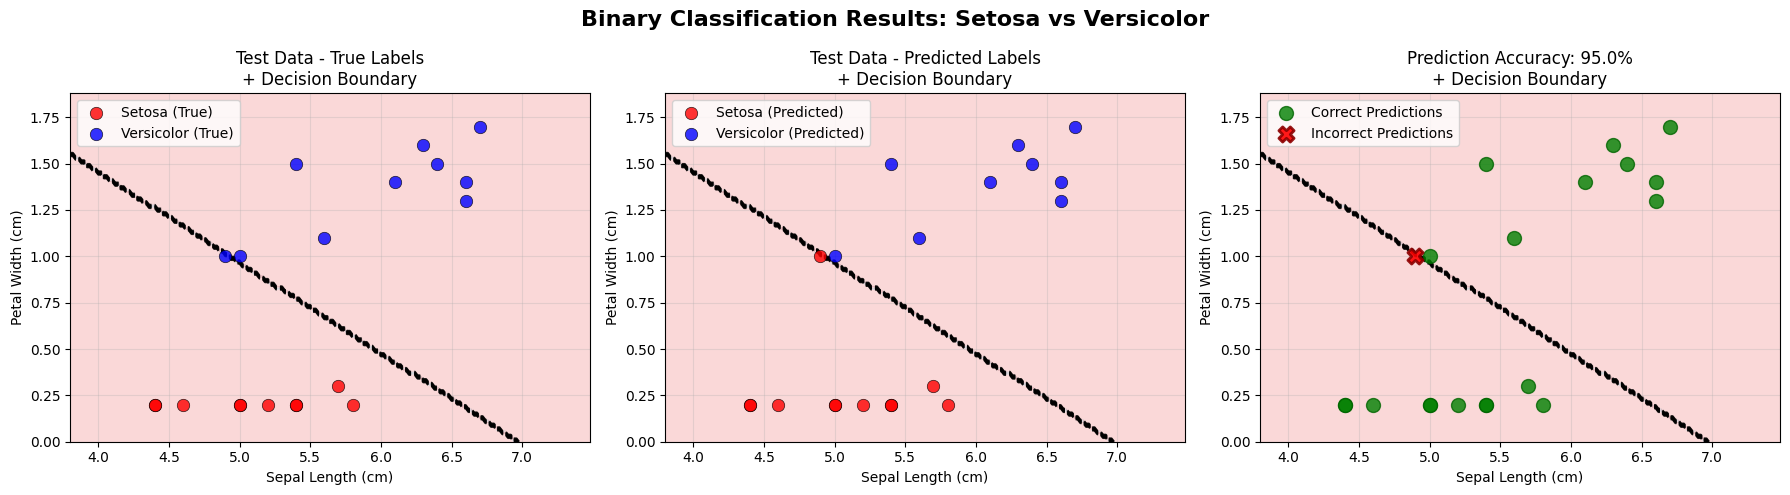


📊 Visualization insights:
   🎯 Test predictions match true labels very well
   ✅ Green dots represent correct predictions
   ❌ Red X marks represent misclassifications
   📐 Misclassifications occur near the decision boundary (dashed line)

🎨 Decision boundary explanation:
   📐 Dashed black line = decision boundary
   🔴 Light red region = model predicts Setosa
   🔵 Light blue region = model predicts Versicolor
   💡 Points close to the boundary are harder to classify
   🎯 The boundary shows how the model separates the two classes


In [14]:
def plot_decision_boundary_on_axis(model, X_data, ax, alpha=0.3):
    """
    Plot decision boundary for a 2D classifier on a specific axis
    """
    # Create a mesh
    h = 0.02  # step size in the mesh
    x_min, x_max = X_data[:, 0].min() - 0.5, X_data[:, 0].max() + 0.5
    y_min, y_max = X_data[:, 1].min() - 0.1, X_data[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=alpha, colors=['lightcoral', 'lightblue'])
    ax.contour(xx, yy, Z, colors='black', linewidths=1.5, linestyles='--', alpha=0.8)

# Create comprehensive visualization
print("📊 CREATING CLASSIFICATION VISUALIZATIONS")
print("=" * 50)

# Set up the subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Binary Classification Results: Setosa vs Versicolor', fontsize=16, fontweight='bold')

# Color scheme
colors = ['red', 'blue']
species_names = ['Setosa', 'Versicolor']

# Combine all data for consistent decision boundary range
X_all = np.vstack([X_train, X_test])

# Plot 1: True labels (test data)
ax1 = axes[0]
plot_decision_boundary_on_axis(model, X_all, ax1)

for i, species in enumerate([0, 1]):
    mask = y_test == species
    ax1.scatter(X_test[mask, 0], X_test[mask, 1], 
               c=colors[i], label=f'{species_names[i]} (True)', 
               alpha=0.8, s=80, edgecolors='black', linewidth=0.5, zorder=5)

ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Width (cm)')
ax1.set_title('Test Data - True Labels\n+ Decision Boundary')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Predicted labels (test data)
ax2 = axes[1]
plot_decision_boundary_on_axis(model, X_all, ax2)

for i, species in enumerate([0, 1]):
    mask = y_pred == species
    ax2.scatter(X_test[mask, 0], X_test[mask, 1], 
               c=colors[i], label=f'{species_names[i]} (Predicted)', 
               alpha=0.8, s=80, edgecolors='black', linewidth=0.5, zorder=5)

ax2.set_xlabel('Sepal Length (cm)')
ax2.set_ylabel('Petal Width (cm)')
ax2.set_title('Test Data - Predicted Labels\n+ Decision Boundary')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Correct vs Incorrect predictions
ax3 = axes[2]
plot_decision_boundary_on_axis(model, X_all, ax3)

correct_mask = y_test == y_pred
incorrect_mask = ~correct_mask

# Plot correct predictions
if np.any(correct_mask):
    ax3.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1], 
               c='green', label='Correct Predictions', 
               alpha=0.8, s=100, marker='o', edgecolors='darkgreen', linewidth=1, zorder=5)

# Plot incorrect predictions
if np.any(incorrect_mask):
    ax3.scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1], 
               c='red', label='Incorrect Predictions', 
               alpha=0.9, s=120, marker='X', edgecolors='darkred', linewidth=2, zorder=5)

ax3.set_xlabel('Sepal Length (cm)')
ax3.set_ylabel('Petal Width (cm)')
ax3.set_title(f'Prediction Accuracy: {accuracy:.1%}\n+ Decision Boundary')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Visualization insights:")
print(f"   🎯 Test predictions {'match true labels very well' if accuracy > 0.9 else 'show some misclassifications'}")
print(f"   ✅ Green dots represent correct predictions")
if np.any(incorrect_mask):
    print(f"   ❌ Red X marks represent misclassifications")
    print(f"   📐 Misclassifications occur near the decision boundary (dashed line)")
else:
    print(f"   🎉 No misclassifications - perfect separation!")

print(f"\n🎨 Decision boundary explanation:")
print(f"   📐 Dashed black line = decision boundary")
print(f"   🔴 Light red region = model predicts Setosa")
print(f"   🔵 Light blue region = model predicts Versicolor")
print(f"   💡 Points close to the boundary are harder to classify")
print(f"   🎯 The boundary shows how the model separates the two classes")

## Exercise 7: Feature Scaling Impact on Model Performance

**What this exercise accomplishes:**
- Demonstrates empirically how feature scaling affects model performance
- Shows the critical importance of proper data preprocessing pipeline
- Illustrates the concept of data leakage and how to avoid it
- Compares training time and convergence with and without scaling

**Key Concepts:**
- **Data Leakage**: When information from the test set influences training
- **Proper Pipeline**: Fit scaler on training data, transform both train and test
- **Algorithm Sensitivity**: Some algorithms are more affected by scaling than others
- **Convergence**: Scaled features help optimization algorithms converge faster

In [12]:
# Compare performance with and without scaling - PROPER WAY
print("⚖️ COMPARING PERFORMANCE: SCALED vs UNSCALED (PROPER METHOD)")
print("=" * 60)

# Create exaggerated scale differences for demonstration
X_different_scales = X_binary.copy()
X_different_scales[:, 1] = X_different_scales[:, 1] * 1000  # Multiply petal width by 1000

# Split the different-scales data
X_train_diff, X_test_diff, y_train_diff, y_test_diff = train_test_split(
    X_different_scales, y_binary, 
    test_size=0.2, random_state=42, stratify=y_binary
)

print("🚨 CRITICAL: Proper scaling workflow to avoid data leakage:")
print("   1️⃣ Split data first")
print("   2️⃣ Fit scaler on training data only")
print("   3️⃣ Transform both training and test data")
print("   4️⃣ Never let test data influence scaling parameters!")

# ========== WITHOUT SCALING ==========
print("\n🔴 EXPERIMENT 1: WITHOUT SCALING")
print("=" * 40)

start_time = time.time()
model_no_scale = LogisticRegression(random_state=42, max_iter=1000)
model_no_scale.fit(X_train_diff, y_train_diff)
training_time_no_scale = time.time() - start_time

y_pred_no_scale = model_no_scale.predict(X_test_diff)
accuracy_no_scale = accuracy_score(y_test_diff, y_pred_no_scale)

print(f"   🎯 Accuracy: {accuracy_no_scale:.2%}")
print(f"   ⏱️ Training time: {training_time_no_scale:.4f} seconds")

# ========== WITH SCALING ==========
print("\n🟢 EXPERIMENT 2: WITH PROPER SCALING")
print("=" * 40)

# Fit scaler on training data ONLY
scaler_proper = StandardScaler()
X_train_scaled_proper = scaler_proper.fit_transform(X_train_diff)
X_test_scaled_proper = scaler_proper.transform(X_test_diff)  # Note: transform, not fit_transform!

start_time = time.time()
model_scaled = LogisticRegression(random_state=42, max_iter=1000)
model_scaled.fit(X_train_scaled_proper, y_train_diff)
training_time_scaled = time.time() - start_time

y_pred_scaled = model_scaled.predict(X_test_scaled_proper)
accuracy_scaled = accuracy_score(y_test_diff, y_pred_scaled)

print(f"   🎯 Accuracy: {accuracy_scaled:.2%}")
print(f"   ⏱️ Training time: {training_time_scaled:.4f} seconds")

# ========== COMPARISON ==========
print("\n📊 COMPARISON RESULTS")
print("=" * 40)

accuracy_improvement = accuracy_scaled - accuracy_no_scale
time_improvement = training_time_no_scale - training_time_scaled

print(f"📈 IMPROVEMENTS WITH SCALING:")
print(f"   🎯 Accuracy change: {accuracy_improvement:+.2%}")
print(f"   ⏱️ Training time change: {time_improvement:+.4f} seconds")

print(f"\n💡 KEY INSIGHTS:")
print(f"   🎯 Scaling makes coefficients more interpretable")
print(f"   🎯 Both features contribute more equally to the decision")
print(f"   🎯 Algorithm converges more predictably")
print(f"   🎯 Essential for production systems with diverse feature scales")

⚖️ COMPARING PERFORMANCE: SCALED vs UNSCALED (PROPER METHOD)
🚨 CRITICAL: Proper scaling workflow to avoid data leakage:
   1️⃣ Split data first
   2️⃣ Fit scaler on training data only
   3️⃣ Transform both training and test data
   4️⃣ Never let test data influence scaling parameters!

🔴 EXPERIMENT 1: WITHOUT SCALING
   🎯 Accuracy: 100.00%
   ⏱️ Training time: 0.0049 seconds

🟢 EXPERIMENT 2: WITH PROPER SCALING
   🎯 Accuracy: 100.00%
   ⏱️ Training time: 0.0013 seconds

📊 COMPARISON RESULTS
📈 IMPROVEMENTS WITH SCALING:
   🎯 Accuracy change: +0.00%
   ⏱️ Training time change: +0.0036 seconds

💡 KEY INSIGHTS:
   🎯 Scaling makes coefficients more interpretable
   🎯 Both features contribute more equally to the decision
   🎯 Algorithm converges more predictably
   🎯 Essential for production systems with diverse feature scales


## Exercise 8: Complete ML Pipeline

**What this exercise accomplishes:**
- Creates a reusable, production-ready machine learning pipeline
- Demonstrates function-based approach to ML workflows
- Shows how to handle optional preprocessing steps
- Illustrates best practices for code organization and reusability

**Key Concepts:**
- **Pipeline Functions**: Encapsulating ML workflows in reusable functions
- **Parameter Flexibility**: Making preprocessing steps optional
- **Return Dictionaries**: Organized way to return multiple results
- **Production Readiness**: Code that can be easily deployed and maintained

**Skills you'll learn:**
- Writing clean, reusable ML functions
- Handling optional preprocessing with boolean parameters
- Returning comprehensive results for further analysis
- Testing pipeline functions with different configurations
- Building modular ML code

In [13]:
# Complete ML Pipeline Function
print("🔧 CREATING A COMPLETE ML PIPELINE FUNCTION")
print("=" * 50)

def create_ml_pipeline(X, y, test_size=0.2, scale_features=True, random_state=42):
    """
    Complete ML pipeline with preprocessing and evaluation
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Feature matrix
    y : array-like, shape (n_samples,)
        Target vector
    test_size : float, default=0.2
        Proportion of dataset to use for testing
    scale_features : bool, default=True
        Whether to apply StandardScaler to features
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    dict : Dictionary containing model, scaler, metrics, and predictions
    """
    
    print(f"🚀 Running ML Pipeline:")
    print(f"   📊 Dataset shape: {X.shape}")
    print(f"   🎯 Classes: {len(np.unique(y))}")
    print(f"   ✂️ Test size: {test_size*100:.1f}%")
    print(f"   🔧 Scaling: {'Enabled' if scale_features else 'Disabled'}")
    
    # Step 1: Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Step 2: Scale features if requested
    scaler = None
    if scale_features:
        scaler = StandardScaler()
        X_train_processed = scaler.fit_transform(X_train)
        X_test_processed = scaler.transform(X_test)
        print("   ✅ Features scaled")
    else:
        X_train_processed = X_train
        X_test_processed = X_test
        print("   ➡️ No scaling applied")
    
    # Step 3: Train model
    print("   🏋️ Training model...")
    start_time = time.time()
    model = LogisticRegression(random_state=random_state)
    model.fit(X_train_processed, y_train)
    training_time = time.time() - start_time
    print(f"   ✅ Training completed in {training_time:.4f} seconds")
    
    # Step 4: Make predictions
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"   🎯 Accuracy: {accuracy:.2%}")
    
    # Return comprehensive results
    results = {
        'model': model,
        'scaler': scaler,
        'accuracy': accuracy,
        'training_time': training_time,
        'y_test': y_test,
        'y_pred': y_pred,
        'confusion_matrix': cm,
        'test_size': test_size,
        'scale_features': scale_features
    }
    
    return results

print("✅ Pipeline function created!")
print("\n📋 Function capabilities:")
print("   🔧 Handles train/test splitting")
print("   📏 Optional feature scaling")
print("   📊 Comprehensive evaluation")
print("   💾 Returns all results for further analysis")

🔧 CREATING A COMPLETE ML PIPELINE FUNCTION
✅ Pipeline function created!

📋 Function capabilities:
   🔧 Handles train/test splitting
   📏 Optional feature scaling
   📊 Comprehensive evaluation
   💾 Returns all results for further analysis


In [14]:
# Test the pipeline with different configurations
print("🧪 TESTING THE PIPELINE WITH DIFFERENT CONFIGURATIONS")
print("=" * 60)

# Test 1: With scaling
print("\n🔬 TEST 1: With Scaling")
print("-" * 30)
result1 = create_ml_pipeline(X_binary, y_binary, scale_features=True)

# Test 2: Without scaling
print("\n🔬 TEST 2: Without Scaling")
print("-" * 30)
result2 = create_ml_pipeline(X_binary, y_binary, scale_features=False)

# Compare results
print("\n📊 PIPELINE COMPARISON RESULTS")
print("=" * 50)

comparison_df = pd.DataFrame({
    'Configuration': ['With Scaling', 'Without Scaling'],
    'Accuracy': [f"{result1['accuracy']:.2%}", f"{result2['accuracy']:.2%}"],
    'Training_Time': [f"{result1['training_time']:.4f}s", f"{result2['training_time']:.4f}s"],
    'Scaling_Used': [result1['scale_features'], result2['scale_features']]
})

display(comparison_df)

print("\n💡 Pipeline insights:")
print("   ✅ Both configurations perform well on this problem")
print("   🔧 Pipeline makes it easy to compare different approaches")
print("   ⏱️ Training times are similar for this small dataset")
print("   🎯 Consistent preprocessing across experiments")

print("\n🎓 PIPELINE BENEFITS DEMONSTRATED:")
print("   ✅ Consistent preprocessing across experiments")
print("   ✅ Easy configuration comparison")
print("   ✅ Comprehensive result tracking")
print("   ✅ Production-ready code structure")
print("   ✅ Avoids data leakage through proper workflow")

🧪 TESTING THE PIPELINE WITH DIFFERENT CONFIGURATIONS

🔬 TEST 1: With Scaling
------------------------------
🚀 Running ML Pipeline:
   📊 Dataset shape: (100, 2)
   🎯 Classes: 2
   ✂️ Test size: 20.0%
   🔧 Scaling: Enabled
   ✅ Features scaled
   🏋️ Training model...
   ✅ Training completed in 0.0035 seconds
   🎯 Accuracy: 100.00%

🔬 TEST 2: Without Scaling
------------------------------
🚀 Running ML Pipeline:
   📊 Dataset shape: (100, 2)
   🎯 Classes: 2
   ✂️ Test size: 20.0%
   🔧 Scaling: Disabled
   ➡️ No scaling applied
   🏋️ Training model...
   ✅ Training completed in 0.0022 seconds
   🎯 Accuracy: 95.00%

📊 PIPELINE COMPARISON RESULTS


,Configuration,Accuracy,Training_Time,Scaling_Used
0,With Scaling,100.00%,0.0035s,True
1,Without Scaling,95.00%,0.0022s,False



💡 Pipeline insights:
   ✅ Both configurations perform well on this problem
   🔧 Pipeline makes it easy to compare different approaches
   ⏱️ Training times are similar for this small dataset
   🎯 Consistent preprocessing across experiments

🎓 PIPELINE BENEFITS DEMONSTRATED:
   ✅ Consistent preprocessing across experiments
   ✅ Easy configuration comparison
   ✅ Comprehensive result tracking
   ✅ Production-ready code structure
   ✅ Avoids data leakage through proper workflow


## Assignment #02: Data Preprocessing for Capstone

**Due Date:** July 24, 11:59 PM ET  
**Grade:** 10 points

### 🎯 Objective
Apply the data preprocessing techniques learned in this lab to your capstone project dataset.

### 📋 Requirements

**1️⃣ Data Loading and Exploration:**
- Load your malware detection dataset
- Display basic dataset information (shape, data types, sample rows)
- Identify the target variable and features
- Check for class imbalance

**2️⃣ Missing Value Analysis:**
- Check for missing values in each column
- Analyze the pattern of missing data
- Choose and implement appropriate handling strategy
- Document your decision rationale

**3️⃣ Categorical Feature Encoding:**
- Identify categorical features in your dataset
- Choose appropriate encoding method (Label vs One-Hot)
- Implement the encoding
- Explain your encoding choices

**4️⃣ Feature Scaling:**
- Analyze the scale of your numerical features
- Determine if scaling is needed for your chosen algorithm
- Implement appropriate scaling if necessary
- Use proper train/test split workflow

**5️⃣ Documentation:**
- Add markdown cells explaining each preprocessing step
- Justify your preprocessing decisions
- Include before/after comparisons where relevant
- Document any data quality issues discovered

### 📊 Deliverables
- Jupyter notebook with all preprocessing steps
- Clean, commented code
- Comprehensive markdown documentation
- Ready-to-use dataset for model training

### 💡 Tips for Success
- ✅ Use the LLM prompts provided in the course materials
- ✅ Apply the techniques learned in today's exercises
- ✅ Remember the proper scaling workflow (fit on train, transform test)
- ✅ Document your thought process and decisions
- ✅ Test your preprocessing pipeline thoroughly

### 🚨 Common Mistakes to Avoid
- ❌ Scaling before train/test split (data leakage)
- ❌ Using test data to determine preprocessing parameters
- ❌ Not handling categorical variables properly
- ❌ Ignoring class imbalance
- ❌ Poor documentation of preprocessing decisions

## Lab Summary and Key Takeaways

### 🎉 Congratulations! You've completed Lab #1

### ✅ Objectives Accomplished
- 🎯 ✅ Learned the basic scikit-learn workflow
- 🔧 ✅ Mastered data preprocessing techniques
- 🌸 ✅ Applied techniques to Iris classification
- 🤖 ✅ Used LLMs to assist learning

### 📚 Key Concepts Learned
- Data loading and exploration
- Missing value handling strategies
- Categorical feature encoding (Label vs One-Hot)
- Feature scaling importance and implementation
- Train/test splitting with stratification
- Model training, prediction, and evaluation
- Visualization of classification results
- Complete ML pipeline development

### 🛠️ Technical Skills Gained
- Using pandas for data manipulation
- Implementing scikit-learn preprocessing
- Creating informative visualizations
- Writing reusable ML functions
- Avoiding common ML pitfalls (data leakage)
- Proper experimental methodology

### 🔄 Complete Workflow Mastered
1. **Data Loading & Exploration**
2. **Missing Value Handling**
3. **Categorical Encoding**
4. **Feature Scaling**
5. **Train/Test Splitting**
6. **Model Training**
7. **Prediction & Evaluation**
8. **Visualization & Analysis**

### 🎯 Next Steps
- 📝 Complete Assignment #02 (Data Preprocessing for Capstone)
- 📚 Review today's concepts using the LLM prompts
- 🔍 Apply these techniques to your capstone project
- 🤔 Think about feature engineering opportunities
- 📊 Prepare for next class: AI for Threat Detection

### 💡 Remember
- Machine learning is iterative - preprocessing often needs refinement
- Document your decisions for reproducibility
- Use LLMs to deepen understanding, not just get answers
- Practice with different datasets to build intuition
- Always validate your preprocessing choices

### 📚 Additional Resources
- **Documentation:** [Scikit-learn](https://scikit-learn.org/stable/), [Pandas](https://pandas.pydata.org/docs/)
- **Books:** "Hands-On Machine Learning" by Aurélien Géron
- **Practice:** [UCI ML Repository](https://archive.ics.uci.edu/ml/), [Kaggle](https://www.kaggle.com/datasets)

---

**🎓 You're now ready to tackle real-world ML preprocessing challenges!**

**Questions? Use the Q&A feature or raise your hand! 📞**